# Chapter 5

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

## 垂直駆動アームの角度追従制御

In [2]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
M  = 0.5                 # アームの質量[kg]
mu = 1.5e-2              # 粘性摩擦係数[kg*m^2/s]
J  = 1.0e-2              # 慣性モーメント[kg*m^2]

P = tf( [0,1], [J, mu, M*g*l] )

ref = 30 # 目標角度 [deg]

30

### P制御

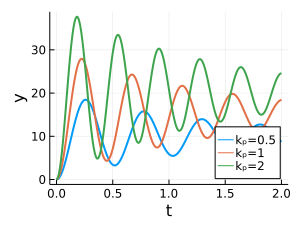

In [3]:
plt = plot()

kp = (0.5, 1, 2)

for i in 1:1:length(kp)
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, ref.*y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="kₚ=$(kp[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end
 
plot(plt)

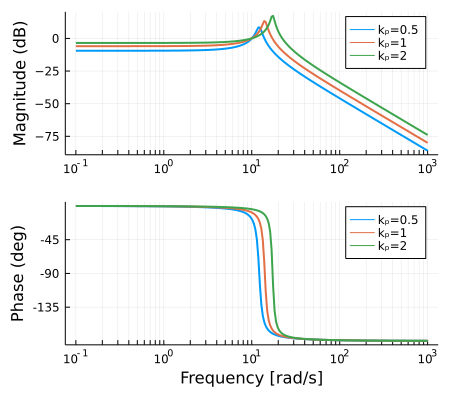

In [4]:
K = [ tf([0, kp[i]], [0, 1]) for i = 1:length(kp) ]
Gyr = [ feedback(P*K[i], 1) for i = 1:length(kp) ]

setPlotScale("dB")
bodeplot(Gyr, lw=2, size=(450,400),
    label=["kₚ=$(kp[1])" "kₚ=$(kp[1])" "kₚ=$(kp[2])" "kₚ=$(kp[2])" "kₚ=$(kp[3])" "kₚ=$(kp[3])"],
    legend=:best, title=""  )

### PD制御

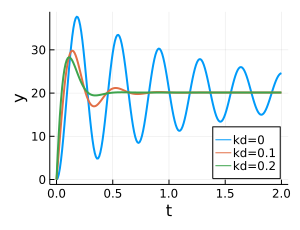

In [5]:
plt = plot()

kp = 2
kd = (0, 0.1, 0.2)

for i in 1:1:length(kd)
    K = tf([kd[i], kp], [0, 1])
    Gyr = feedback(P*K, 1)
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, ref.*y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="kd=$(kd[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end
 
plot(plt)

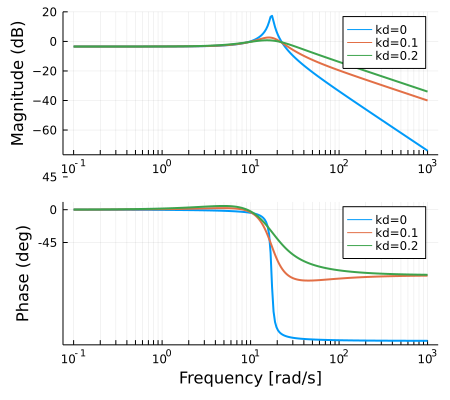

In [6]:
K = [ tf([kd[i], kp], [0, 1]) for i = 1:length(kd) ]
Gyr = [ feedback(P*K[i], 1) for i = 1:length(kd) ]

setPlotScale("dB")
bodeplot(Gyr, lw=2, size=(450,400),
    label=["kd=$(kd[1])" "kd=$(kd[1])" "kd=$(kd[2])" "kd=$(kd[2])" "kd=$(kd[3])" "kd=$(kd[3])"],
    legend=:best, title=""  )

### PID制御

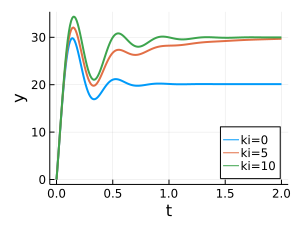

In [7]:
kp = 2
kd = 0.1
ki = (0, 5, 10)

plt = plot()

for i in 1:1:length(ki)
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyr = feedback(P*K, 1)
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, ref.*y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="ki=$(ki[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end
 
plot(plt)

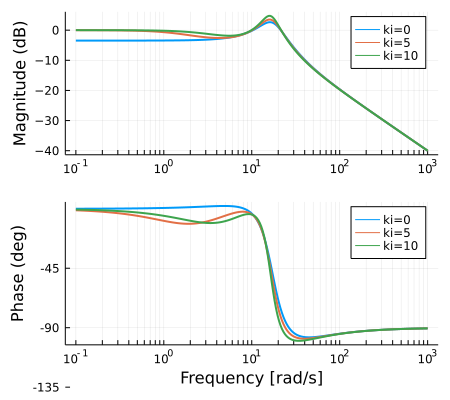

In [8]:
K = [ tf([kd, kp, ki[i]], [1, 0]) for i = 1:length(ki) ]
Gyr = [ feedback(P*K[i], 1) for i = 1:length(ki) ]

setPlotScale("dB")
bodeplot(Gyr, lw=2, size=(450,400), 
    label=["ki=$(ki[1])" "ki=$(ki[1])" "ki=$(ki[2])" "ki=$(ki[2])" "ki=$(ki[3])" "ki=$(ki[3])"],
    legend=:best, title=""  )

### 練習問題（外乱抑制）

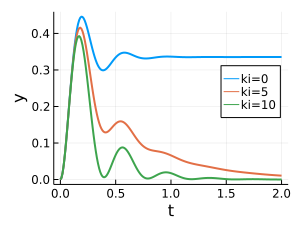

In [9]:
kp = 2
kd = 0.1
ki = (0, 5, 10)

plt = plot()

for i in 1:1:length(ki)
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyr = feedback(P, K)
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="ki=$(ki[i])",
        legend=:right,
        size=(300,230)   #プロットのサイズ 
    )
end
 
plot(plt)

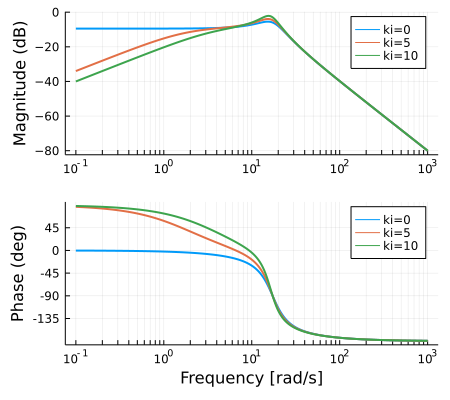

In [10]:
K = [ tf([kd, kp, ki[i]], [1, 0]) for i = 1:length(ki) ]
Gyd = [ feedback(P, K[i]) for i = 1:length(ki) ]

setPlotScale("dB")
bodeplot(Gyd, lw=2, size=(450,400), 
    label=["ki=$(ki[1])" "ki=$(ki[1])" "ki=$(ki[2])" "ki=$(ki[2])" "ki=$(ki[3])" "ki=$(ki[3])"],
    legend=:best, title=""  )

## 2自由度制御

In [11]:
kp = 2
ki = 10
kd = 0.1

K1 = tf([kd, kp, ki], [1, 0]);
K2 = tf([0, ki], [kd, kp, ki]);
K3 = tf([kp, ki], [kd, kp, ki]);

### PI-D制御

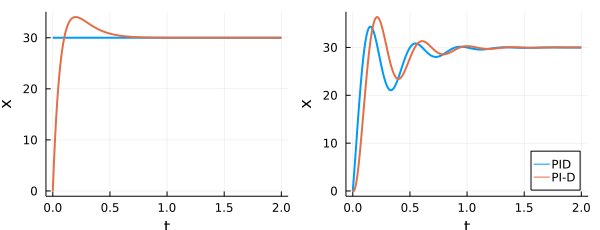

In [12]:
Gyz = feedback(P*K1, 1)

Td = 0:0.01:2
r = [ 1 for i in Td]

yorg, t, x, uout = lsim(Gyz, r', Td);

z, t, x, uout = lsim(K3, r', Td);
y, t, x, uout = lsim(Gyz, z, Td);

p = [ plot(), plot()]

plot!(p[1], t, ref*r,
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

plot!(p[1], t, ref*z',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*yorg',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PID",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PI-D",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
)


plot( p[1], p[2], layout=(1,2), size=(600,230) )

制御入力の計算

PID制御では，$G_{ur}$ がインプロパーになるので，擬似微分を用いて計算する

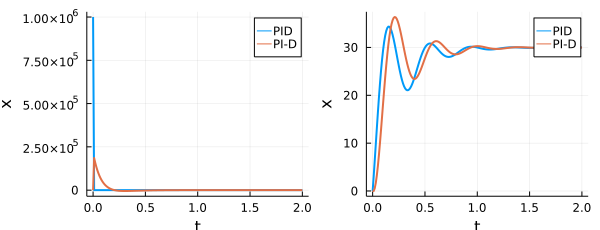

In [13]:
tau = 0.0000001 # ローパスフィルタ
Klp = tf([kd, 0], [tau, 1]) # 擬似微分器
Ktau = tf([kp, ki], [1, 0]) + Klp

Gyz = feedback(P*Ktau, 1)
Guz = Ktau/(1+P*Ktau)

Td = 0:0.01:2
r = [ 1 for i in Td]

yorg, t, x, uout = lsim(Gyz, r', Td);
ur, t, x, uout = lsim(Guz, r', Td);

z, t, x, uout = lsim(K3, r', Td);
y, t, x, uout = lsim(Gyz, z, Td);
uz, t, x, uout = lsim(Guz, z, Td);

p = [ plot(), plot()]

plot!(p[1], t, ur',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PID",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[1], t, uz',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PI-D",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*yorg',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PID",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PI-D",
    size=(300,230)   #プロットのサイズ 
)


plot( p[1], p[2], layout=(1,2), size=(600,230) )

### I-PD制御

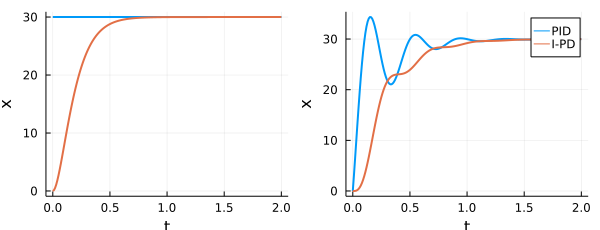

In [14]:
Gyz = feedback(P*K1, 1)

Td = 0:0.01:2
r = [ 1 for i in Td]

yorg, t, x, uout = lsim(Gyz, r', Td);

z, t, x, uout = lsim(K2, r', Td);
y, t, x, uout = lsim(Gyz, z, Td);

p = [ plot(), plot()]

plot!(p[1], t, ref*r,
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

plot!(p[1], t, ref*z',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*yorg',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PID",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="I-PD",
    size=(300,230)   #プロットのサイズ 
)


plot( p[1], p[2], layout=(1,2), size=(600,230) )

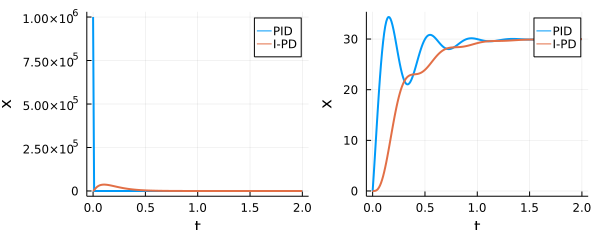

In [15]:
tau = 0.0000001 # ローパスフィルタ
Klp = tf([kd, 0], [tau, 1]) # 擬似微分器
Ktau = tf([kp, ki], [1, 0]) + Klp

Gyz = feedback(P*Ktau, 1)
Guz = Ktau/(1+P*Ktau)

Td = 0:0.01:2
r = [ 1 for i in Td]

yorg, t, x, uout = lsim(Gyz, r', Td);
ur, t, x, uout = lsim(Guz, r', Td);

z, t, x, uout = lsim(K2, r', Td);

y, t, x, uout = lsim(Gyz, z, Td);
uz, t, x, uout = lsim(Guz, z, Td);

p = [ plot(), plot()]

plot!(p[1], t, ur',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PID",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[1], t, uz',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="I-PD",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*yorg',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="PID",
    size=(300,230)   #プロットのサイズ 
)

plot!(p[2], t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="I-PD",
    size=(300,230)   #プロットのサイズ 
)


plot( p[1], p[2], layout=(1,2), size=(600,230) )

# 限界感度法

### 無駄時間要素

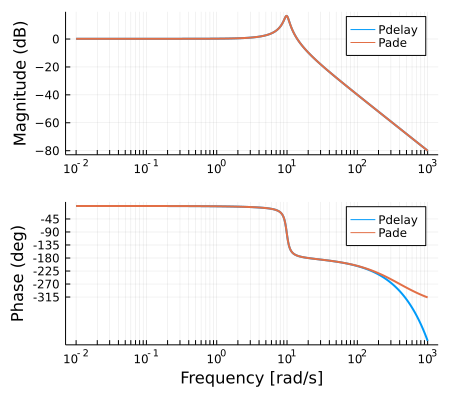

In [16]:
Pdelay = series(P, delay(0.005))

Pdelay_appr = series(P, pade( 0.005, 1)) # パデ近似

w = exp10.(range(-2, 3,1000))
bodeplot([Pdelay, Pdelay_appr], w; lw = 2, 
    label=["Pdelay" "Pdelay" "Pade" "Pade"], title="",size=(450,400))

### チューニング

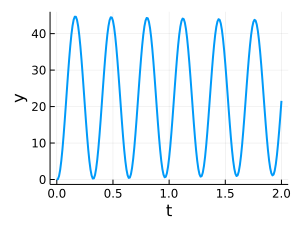

In [17]:
kp0 = 2.9
K = tf([0, kp0], [0, 1])

Gyr = feedback(Pdelay_appr*K, 1)
y, t = step( Gyr, 0:0.01:2 )
plot(t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

Classic
kP=1.74
kI=11.6
kD=0.06525
------------------
No Overshoot
kP=0.58
kI=3.8666666666666667
kD=0.05742
------------------


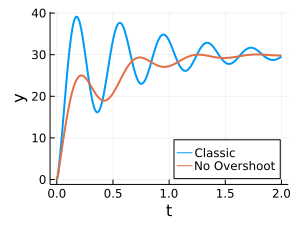

In [18]:
kp = [0.0, 0.0]
ki = [0.0, 0.0]
kd = [0.0, 0.0]
Rule = ["", ""]

T0 = 0.3
# Classic ZN
Rule[1] = "Classic"
kp[1] = 0.6 * kp0
ki[1] = kp[1] / (0.5 * T0)
kd[1] = kp[1] * (0.125 * T0)

# No overshoot
Rule[2] = "No Overshoot"
kp[2] = 0.2 * kp0
ki[2] = kp[2] / (0.5 * T0)
kd[2] = kp[2] * (0.33 * T0)

plt = plot();

for i in 1:2
    K = tf([kd[i], kp[i], ki[i]], [1, 0])
    Gyr = feedback(Pdelay_appr*K, 1)
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, ref*y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="$(Rule[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
    
    println(Rule[i])
    println("kP=", kp[i])
    println("kI=", ki[i])
    println("kD=", kd[i])
    println("------------------")

end

plot(plt)

# モデルマッチング

In [19]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
M  = 0.5                 # アームの質量[kg]
mu = 1.5e-2              # 粘性摩擦係数
J  = 1.0e-2              # 慣性モーメント

P = tf( [0,1], [J, mu, M*g*l] )

ref = 30 # 目標角度 [deg]

30

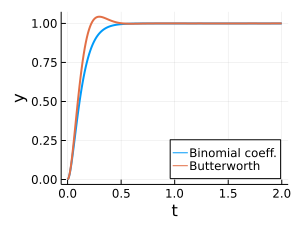

In [20]:
ωₙ = 15
ζ = (1, 1/sqrt(2))
Label = ("Binomial coeff.", "Butterworth")

plt = plot();

for i in 1:2
    Msys = tf([0,ωₙ^2], [1,2*ζ[i]*ωₙ, ωₙ^2])
    yM, t = step( Msys, 0:0.01:2 )

    plot!(plt, t, yM',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="$(Label[i])",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
    )


end

plot(plt)

kP=2.25
kI=10.406647807637908
kD=0.2433517680339462


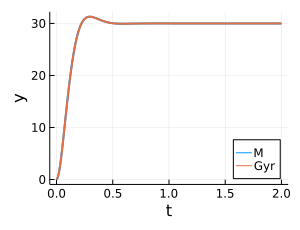

In [21]:
ωₙ = 15
ζ = 0.707

Msys = tf([0, ωₙ^2], [1,2*ζ*ωₙ, ωₙ^2])

kp = ωₙ^2*J
ki = ωₙ*M*g*l/(2*ζ)
kd = 2*ζ*ωₙ*J + M*g*l/(2*ζ*ωₙ) - mu

println("kP=", kp)
println("kI=", ki)
println("kD=", kd)

Gyr = tf([kp,ki], [J, mu+kd, M*g*l+kp, ki])

yM, tM = step(Msys, 0:0.01:2)
y, t = step(Gyr, 0:0.01:2)


plot(t, ref*yM',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="M",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
    )


plot!(t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="Gyr",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
    )

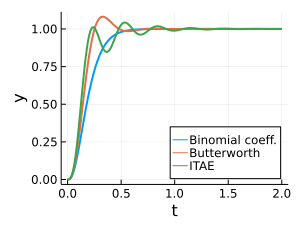

In [22]:
α₁ = (3, 2, 2.15)
α₂ = (3, 2, 1,75)
ωₙ = 15
Label = ("Binomial coeff.", "Butterworth", "ITAE")

plt = plot();

for i in 1:3
    Msys = tf([0, ωₙ^3], [1, α₂[i]*ωₙ, α₁[i]*ωₙ^2, ωₙ^3])
    yM, t = step( Msys, 0:0.01:2 )

    plot!(plt, t, yM',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="$(Label[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )

end

plot(plt)

## 状態フィードバック

In [4]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

### 極配置

In [5]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0 ; 0 1]
D = [0; 0]
P = ss(A, B, C, D)

StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
 0  1
D = 
 0
 0

Continuous-time state-space model

In [6]:
eigvals(A)

2-element Vector{Float64}:
 1.0
 4.0

In [7]:
Pole = [-1, -1]

F = -place(P.A, P.B, Pole)
F

1×2 Matrix{Float64}:
 3.0  -7.0

In [8]:
eigvals(P.A+P.B*F)

2-element Vector{Float64}:
 -1.0000000066889676
 -0.9999999933110325

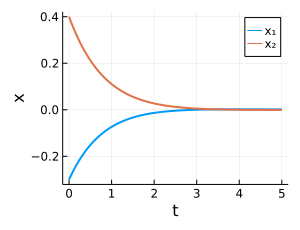

In [9]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

Td = 0:0.01:5
X0 = [-0.3, 0.4]
u(x,t) = 0 
y, t, x, uout = lsim(Pfb, u, Td, x0=X0); #ゼロ入力応答

plot(t, x',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label=["x₁" "x₂"],
    size=(300,230)   #プロットのサイズ 
)

### 最適レギュレータ

In [10]:
Q = [100 0; 0 1]
R = 1

F = lqr(P.A, P.B, Q, R)
F = -F

println("--- フィードバックゲイン ---")
println(F)
println("--- 閉ループ極 ---")
println(eigvals(P.A+P.B*F))

--- フィードバックゲイン ---
[-6.77032961426883 -11.288136387558529]
--- 閉ループ極 ---
ComplexF64[-3.144068193779264 - 0.940831976037392im, -3.144068193779264 + 0.940831976037392im]


In [11]:
X = care(P.A, P.B, Q, R)
FF = - (1/R)*(P.B)'*X

println("--- フィードバックゲイン ---")
println(FF)
println("--- 閉ループ極 ---")
print(eigvals(P.A+P.B*FF))

--- フィードバックゲイン ---
[-6.77032961426883 -11.288136387558529]
--- 閉ループ極 ---
ComplexF64[-3.144068193779264 - 0.940831976037392im, -3.144068193779264 + 0.940831976037392im]

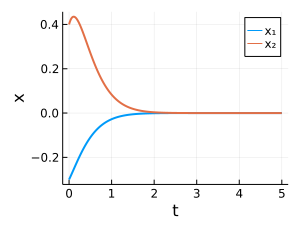

In [12]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

Td = 0:0.01:5
X0 = [-0.3, 0.4]
u(x,t) = 0 
y, t, x, uout = lsim(Pfb, u, Td, x0=X0); #ゼロ入力応答

plot(t, x',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label=["x₁" "x₂"],
    size=(300,230)   #プロットのサイズ 
)

### 円条件（最適レギュレータのロバスト性）

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

In [2]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0 ; 0 1]
D = [0; 0]
P = ss(A, B, C, D)


Q = [100 0; 0 1]
R = 1

F = lqr(P.A, P.B, Q, R)
F = -F
L = ss(P.A, P.B, -F, 0)

println(L)

StateSpace{Continuous, Float64}
A = 
  0.0  1.0
 -4.0  5.0
B = 
 0.0
 1.0
C = 
 6.77032961426883  11.288136387558529
D = 
 0.0

Continuous-time state-space model


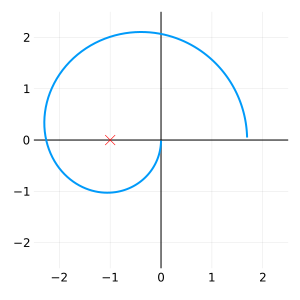

In [4]:
nyquistplot(L; lw = 2, xlims=(-2.5,2.5), ylims=(-2.5,2.5), size=(300,300), legend=false)

開ループ系のナイキスト軌跡が (-1, 0j) を中心とする単位円の中に入らない．

これにより，位相余裕が 60 [deg] 以上であることが保証される．

In [5]:
wpc, GM, wgc, PM = margin(L)
println("位相余裕=$PM")

位相余裕=[60.49937764883873;;]


### ハミルトン行列

In [6]:
H = [ P.A -P.B*(1/R)*P.B';
    -Q -P.A' ]

eigH = eigvals(H)
println(eigH)

println("--- ハミルトン行列の安定固有値 ---")
eigH_stable = [ i for i in eigH if real(i) < 0]
println(eigH_stable)

F = -place(P.A, P.B, eigH_stable)
println("--- フィードバックゲイン ---")
println(F)

ComplexF64[-3.1440681937792805 - 0.9408319760374366im, -3.1440681937792805 + 0.9408319760374366im, 3.1440681937792796 - 0.9408319760374423im, 3.1440681937792796 + 0.9408319760374423im]
--- ハミルトン行列の安定固有値 ---
ComplexF64[-3.1440681937792805 - 0.9408319760374366im, -3.1440681937792805 + 0.9408319760374366im]
--- フィードバックゲイン ---
ComplexF64[-6.770329614269015 - 0.0im -11.288136387558561 - 0.0im]


## 積分サーボ系

In [2]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0 ; 0 1]
D = [0; 0]
P = ss(A, B, C, D)

StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
 0  1
D = 
 0
 0

Continuous-time state-space model

In [3]:
Pole = [-1, -1]
F = -place(P.A, P.B, Pole)

1×2 Matrix{Float64}:
 3.0  -7.0

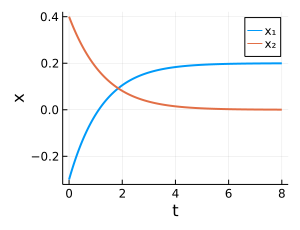

In [6]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

Td = 0:0.01:8
X0 = [-0.3, 0.4]
u(x,t) = 0.2
y, t, x, uout = lsim(Pfb, u, Td, x0=X0); #ゼロ入力応答

plot(t, x',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label=["x₁" "x₂"],
    size=(300,230)   #プロットのサイズ 
)

In [7]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0]
D = 0
P = ss(A, B, C, D)

StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
D = 
 0

Continuous-time state-space model

In [8]:
Abar = [P.A zeros((2,1)) ;  P.C 0 ];
Bbar = [P.B; 0 ];
Cbar = [P.C 0 ];

In [9]:
Pole = [-1, -1, -5]
F = -place(Abar, Bbar, Pole)

1×3 Matrix{Float64}:
 -7.0  -12.0  -5.0

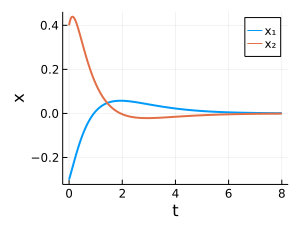

In [11]:
Acl = Abar + Bbar*F
Pfb = ss(Acl, Bbar, [1 0 0; 0 1 0; 0 0 1] , zeros((3,1)))

Td = 0:0.01:8
X0 = [-0.3, 0.4, 0]
u(x,t) = 0.2
y, t, x, uout = lsim(Pfb, u, Td, x0=X0); #ゼロ入力応答

plot(t, x[1:2, :]',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label=["x₁" "x₂"],
    size=(300,230)   #プロットのサイズ 
)

## 可制御性，可観測性

In [12]:
A = [0 1; -4 5]
B = [0; 1]
C = [1 0]
D = 0
P = ss(A, B, C, D)

StateSpace{Continuous, Int64}
A = 
  0  1
 -4  5
B = 
 0
 1
C = 
 1  0
D = 
 0

Continuous-time state-space model

In [13]:
Uc = ctrb(P.A, P.B)
println("Uc=$Uc")
println("det(Uc)=", det(Uc))
println("rank(Uc)=", rank(Uc))

Uc=[0 1; 1 5]
det(Uc)=-1.0
rank(Uc)=2


In [14]:
Uo = obsv(P.A, P.C)
println("Uo=", Uo)
println("det(Uo)=", det(Uo))
println("rank(Uo)=", rank(Uo))

Uo=[1 0; 0 1]
det(Uo)=1.0
rank(Uo)=2
